In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from  sklearn.preprocessing import LabelEncoder

In [60]:
company=pd.read_csv(r'C:\Users\user\Downloads\Company_Data.csv')
company2=company.iloc[:,0:7]
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,9.50,138,73,11,276,120,Bad
1,11.22,111,48,16,260,83,Good
2,10.06,113,35,10,269,80,Medium
3,7.40,117,100,4,466,97,Medium
4,4.15,141,64,3,340,128,Bad
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good
396,6.14,139,23,3,37,120,Medium
397,7.41,162,26,12,368,159,Medium
398,5.94,100,79,7,284,95,Bad


In [61]:
company2["SALES"] = pd.cut(company2["Sales"], bins = [4,8,12], labels = ["Risky", "Good"])

In [62]:
print(company2)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  SALES
0     9.50        138      73           11         276    120       Bad   Good
1    11.22        111      48           16         260     83      Good   Good
2    10.06        113      35           10         269     80    Medium   Good
3     7.40        117     100            4         466     97    Medium  Risky
4     4.15        141      64            3         340    128       Bad  Risky
..     ...        ...     ...          ...         ...    ...       ...    ...
395  12.57        138     108           17         203    128      Good    NaN
396   6.14        139      23            3          37    120    Medium  Risky
397   7.41        162      26           12         368    159    Medium  Risky
398   5.94        100      79            7         284     95       Bad  Risky
399   9.71        134      37            0          27    120      Good   Good

[400 rows x 8 columns]


In [63]:
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,SALES
0,9.50,138,73,11,276,120,Bad,Good
1,11.22,111,48,16,260,83,Good,Good
2,10.06,113,35,10,269,80,Medium,Good
3,7.40,117,100,4,466,97,Medium,Risky
4,4.15,141,64,3,340,128,Bad,Risky
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,NaN
396,6.14,139,23,3,37,120,Medium,Risky
397,7.41,162,26,12,368,159,Medium,Risky
398,5.94,100,79,7,284,95,Bad,Risky


In [64]:
#Getting Dummies for all other categorical vars
for col in company2.dtypes[company2.dtypes=="object"].index:
    for_dummy=company2.pop(col)
    company2=pd.concat([company2,pd.get_dummies(for_dummy,prefix=col)],axis=1)
company2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,SALES,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Good,1,0,0
1,11.22,111,48,16,260,83,Good,0,1,0
2,10.06,113,35,10,269,80,Good,0,0,1
3,7.40,117,100,4,466,97,Risky,0,0,1
4,4.15,141,64,3,340,128,Risky,1,0,0


In [66]:
labelenocer=LabelEncoder()
(company2['SALES'])=labelenocer.fit_transform(company2['SALES'])

In [67]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [68]:
company2

,Sales,CompPrice,Income,Advertising,Population,Price,SALES,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,0,1,0,0
1,11.22,111,48,16,260,83,0,0,1,0
2,10.06,113,35,10,269,80,0,0,0,1
3,7.40,117,100,4,466,97,1,0,0,1
4,4.15,141,64,3,340,128,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,0,1,0
396,6.14,139,23,3,37,120,1,0,0,1
397,7.41,162,26,12,368,159,1,0,0,1
398,5.94,100,79,7,284,95,1,1,0,0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(company2.iloc[:,0:6])
df_norm.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price
390,0.336202,0.316327,0.545455,0.310345,0.102204,0.520958
391,0.374923,0.775510,0.424242,0.000000,0.078156,0.598802
392,0.278427,0.530612,0.212121,0.448276,0.611222,0.634731
393,0.342348,0.326531,0.303030,0.344828,0.032064,0.574850
394,0.328826,0.540816,0.373737,0.655172,0.713427,0.688623
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150
399,0.596804,0.581633,0.161616,0.000000,0.034068,0.574850


In [71]:
company5=company2.iloc[:,6]
company5

0      0
1      0
2      0
3      1
4      1
      ..
395    2
396    1
397    1
398    1
399    0
Name: SALES, Length: 400, dtype: int64

In [72]:
company3=pd.concat([df_norm,company5],axis=1)
company3

,Sales,CompPrice,Income,Advertising,Population,Price,SALES
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,1
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,1
...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,2
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,1
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,1
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,1


In [73]:
x5=company3.iloc[:,0:6]
y5=company3.iloc[:,6]

In [74]:
x5

,Sales,CompPrice,Income,Advertising,Population,Price
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754
...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150


In [75]:
y5

0      0
1      0
2      0
3      1
4      1
      ..
395    2
396    1
397    1
398    1
399    0
Name: SALES, Length: 400, dtype: int64

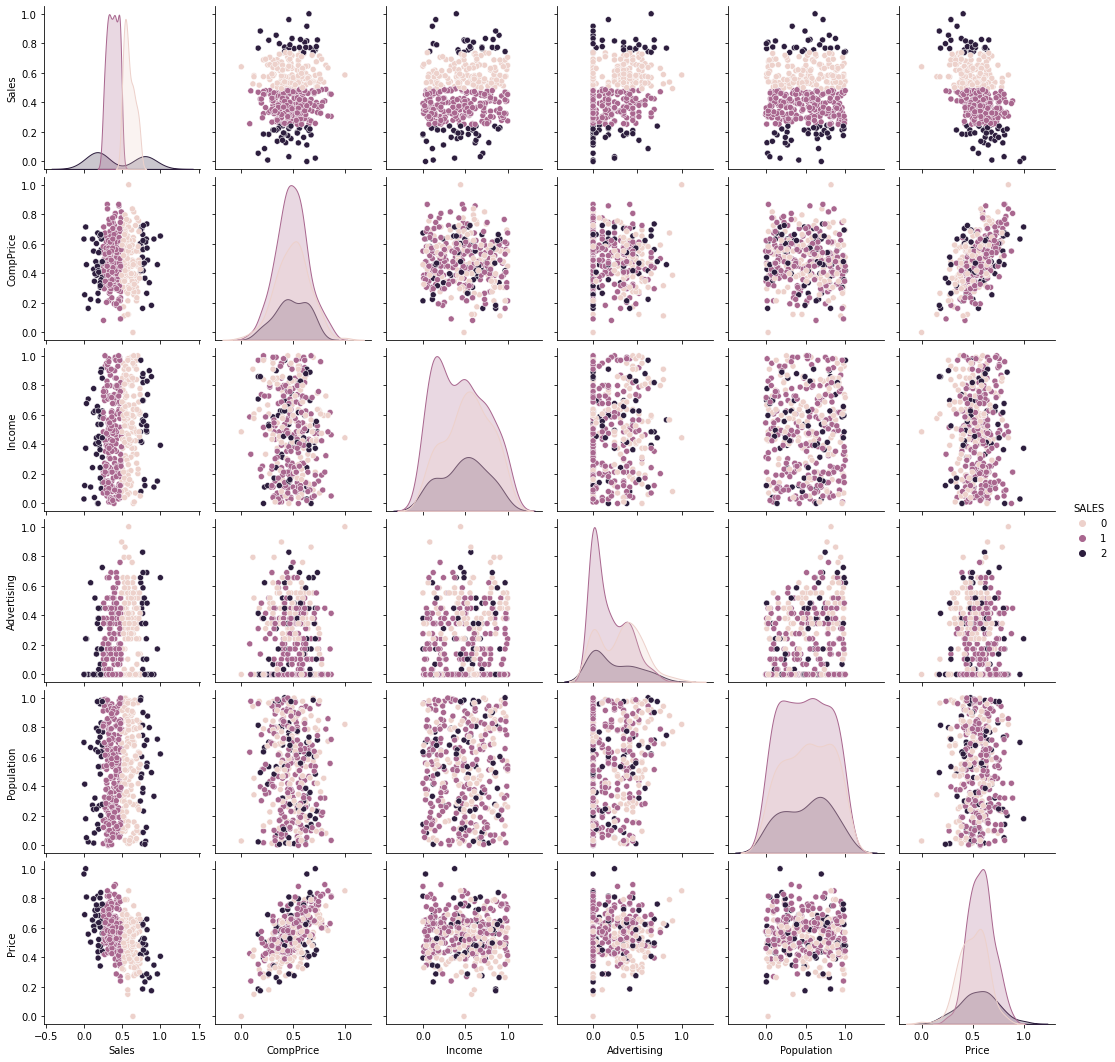

In [76]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=company3, hue = 'SALES')

In [77]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(x5,y5, test_size=0.2, random_state=0)

In [78]:
model5=DecisionTreeClassifier(criterion ='entropy',max_depth=3)

In [79]:
model5.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
preds5=model5.predict(Xtest)

In [81]:
np.mean(preds5==ytest)*100

100.0

In [82]:
print(classification_report(preds5,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        10

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [84]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [85]:
Kfold =    KFold(n_splits=10)
model3 =   RandomForestClassifier(n_estimators=100,max_features=3)
results=   cross_val_score(model5,x5,y5,cv=Kfold)
print(results.mean()*100)

99.75
